# Malicious Samples on Holdout/Tesst Split

This notebook produces a copy of the Holdout/Test Split for each behavior-type (e.g., TB and IB) and for each GBDT model (e.g., LightGBM and CatBoost) containing only the malicious samples for verification.

The output can then be used for determining what malware type is the model strong and weak at which could be the same as the findings according to the Dataset Analysis.

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

#Load list of API calls
API_LIST = "api_calls.txt"
DELIMITER = "NaN"
API_FILE = open(API_LIST,"r")
APIS = API_FILE.readline().split(',')
APIS.append(DELIMITER) #serves as a label for NaN values for Instance-based datasets
API_FILE.close()

def label_encode(df):
    global APIS
    global ENCODED
    le = LabelEncoder()
    le.fit(APIS)
    df.iloc[:,1:101] = df.iloc[:,1:101].apply(le.transform)
    return df

Type 1
trojan        3393
adware         303
downloader     272
_              247
ransomware      35
pua             10
miner           10
virus            8
hacktool         6
Name: count, dtype: int64

Type 2
adware        2398
_              865
trojan         437
downloader     193
dropper        114
pua             68
ransomware      58
spyware         55
miner           33
banker          28
virus           22
worm             7
hacktool         6
Name: count, dtype: int64

Type 3
_             2937
pua            445
virus          261
downloader     180
adware         157
trojan         136
dropper        126
spyware         19
ransomware       6
miner            6
hacktool         6
banker           2
worm             2
fakeav           1
Name: count, dtype: int64

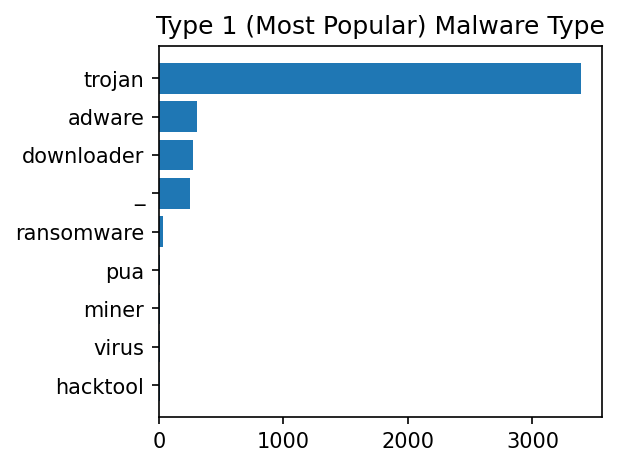

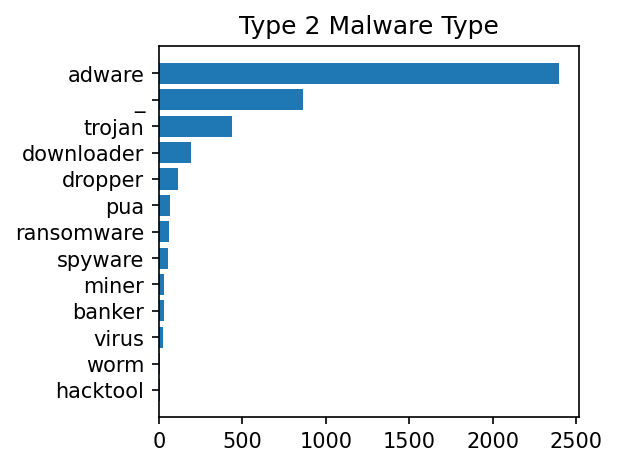

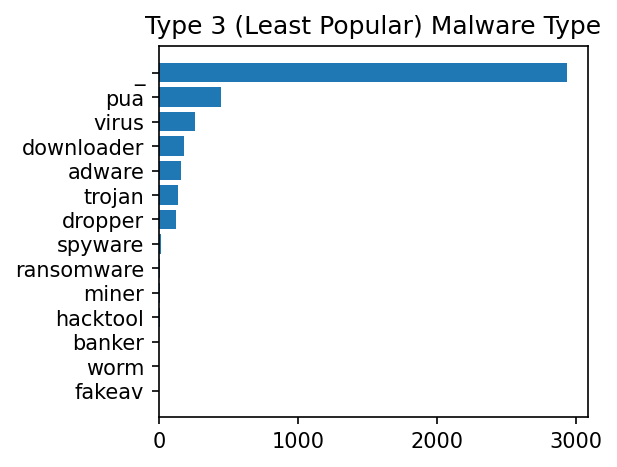

In [2]:
def plotbarh(df, col, title):
    fig, axs = plt.subplots(nrows=1, layout='constrained')
    fig.set_figwidth(4)
    fig.set_figheight(3)
    fig.set_dpi(150)
    axs.set_title(title)
    axs.barh(df[col].value_counts().index, df[col].value_counts(), )
    axs.invert_yaxis()
    display(df[col].value_counts())
    axs.plot()

reference = pd.read_csv('./Holdout-Test_Malicious_Verify.csv').fillna("NaN")
plotbarh(reference, 'Type 1', 'Type 1 (Most Popular) Malware Type')
plotbarh(reference, 'Type 2', 'Type 2 Malware Type')
plotbarh(reference, 'Type 3', 'Type 3 (Least Popular) Malware Type')

In [3]:
reference = pd.read_csv('./TB/CATB_TB_Test.csv').fillna("NaN")
reference = reference[reference['malware'] == 1]
new_col = ['_'] * reference.shape[0]
reference['Type 1'] = new_col
reference['Type 2'] = new_col
reference['Type 3'] = new_col
reference_encoded = label_encode(reference.copy(deep=True))
display(reference)
display(reference_encoded)

reference.to_csv('./TB/CATB_TB_Test_Malicious.csv', index=False)
reference_encoded.to_csv('./TB/LGBM_TB_Test_Malicious.csv', index=False)

,malware,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_94,t_95,t_96,t_97,t_98,t_99,hash,Type 1,Type 2,Type 3
0,1,NtClose,NtOpenKey,NtQueryValueKey,NtClose,NtOpenKey,NtQueryValueKey,NtClose,LdrGetDllHandle,LdrGetProcedureAddress,...,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,LdrGetDllHandle,f0f8ba4c3d750a4ce2deea48152a33d4,_,_,_
1,1,SetErrorMode,OleInitialize,LdrGetDllHandle,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,...,LdrLoadDll,LdrGetProcedureAddress,RegQueryValueExW,RegCloseKey,RegOpenKeyExW,RegQueryValueExW,39b2d87c1adb582fbcacc3a56e274d48,_,_,_
2,1,GetSystemTimeAsFileTime,NtAllocateVirtualMemory,NtFreeVirtualMemory,NtAllocateVirtualMemory,LdrGetDllHandle,LdrGetProcedureAddress,LdrGetDllHandle,NtAllocateVirtualMemory,SetUnhandledExceptionFilter,...,LdrGetProcedureAddress,NtAllocateVirtualMemory,LdrGetDllHandle,LdrGetProcedureAddress,NtOpenProcess,NtClose,429236cdeb63d68bf48a3b48b0a34612,_,_,_
3,1,RegOpenKeyExA,NtOpenKey,NtQueryValueKey,NtClose,NtOpenKey,NtQueryValueKey,NtClose,NtQueryAttributesFile,LoadStringA,...,NtMapViewOfSection,NtClose,GetSystemMetrics,NtAllocateVirtualMemory,CreateActCtxW,GetSystemWindowsDirectoryW,46079cbf0bcfe8fab9894b4ec88bece3,_,_,_
4,1,GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,...,RegOpenKeyExW,RegQueryValueExW,RegOpenKeyExW,RegQueryValueExW,RegOpenKeyExW,RegQueryValueExW,303ceda3f52afa9b69ed4f97fec2c895,_,_,_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4383,1,GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,GetFileType,LdrGetProcedureAddress,LdrGetDllHandle,LdrGetProcedureAddress,...,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,GetSystemInfo,LdrLoadDll,LdrGetProcedureAddress,ace1fb315abc4e4a10624c8b03f917aa,_,_,_
4384,1,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,...,LoadResource,FindResourceExW,LoadResource,FindResourceExW,LoadResource,FindResourceExW,f8948ed47902c6400b086a867685c107,_,_,_
4385,1,GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,...,RegOpenKeyExW,RegQueryValueExW,RegOpenKeyExW,RegQueryValueExW,RegOpenKeyExW,RegQueryValueExW,131e9e0e7ce851fd4be463c32e025c7b,_,_,_
4386,1,LdrLoadDll,NtProtectVirtualMemory,LdrLoadDll,NtProtectVirtualMemory,CoInitializeEx,NtCreateMutant,LdrGetDllHandle,LdrGetProcedureAddress,LdrGetDllHandle,...,NtClose,NtOpenKeyEx,LdrGetProcedureAddress,NtQueryKey,NtClose,NtOpenKeyEx,c85d6c224b59b3ce76698e9d5aacd3ae,_,_,_


,malware,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_94,t_95,t_96,t_97,t_98,t_99,hash,Type 1,Type 2,Type 3
0,1,154,177,191,154,177,191,154,134,135,...,135,136,135,136,135,134,f0f8ba4c3d750a4ce2deea48152a33d4,_,_,_
1,1,254,209,134,136,135,136,135,136,135,...,136,135,236,219,232,236,39b2d87c1adb582fbcacc3a56e274d48,_,_,_
2,1,95,153,170,153,134,135,134,153,262,...,135,153,134,135,180,154,429236cdeb63d68bf48a3b48b0a34612,_,_,_
3,1,231,177,191,154,177,191,154,184,139,...,174,154,94,153,16,97,46079cbf0bcfe8fab9894b4ec88bece3,_,_,_
4,1,95,136,135,136,135,136,135,136,135,...,232,236,232,236,232,236,303ceda3f52afa9b69ed4f97fec2c895,_,_,_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4383,1,95,136,135,136,135,81,135,134,135,...,135,136,135,93,136,135,ace1fb315abc4e4a10624c8b03f917aa,_,_,_
4384,1,136,135,136,135,136,135,136,135,136,...,138,59,138,59,138,59,f8948ed47902c6400b086a867685c107,_,_,_
4385,1,95,136,135,136,135,136,135,136,135,...,232,236,232,236,232,236,131e9e0e7ce851fd4be463c32e025c7b,_,_,_
4386,1,136,183,136,183,9,158,134,135,134,...,154,178,135,188,154,178,c85d6c224b59b3ce76698e9d5aacd3ae,_,_,_


In [4]:
reference = pd.read_csv('./IB/CATB_IB_Test.csv').fillna("NaN")
reference = reference[reference['malware'] == 1]
new_col = ['_'] * reference.shape[0]
reference['Type 1'] = new_col
reference['Type 2'] = new_col
reference['Type 3'] = new_col
reference_encoded = label_encode(reference.copy(deep=True))
display(reference)
display(reference_encoded)

reference.to_csv('./IB/CATB_IB_Test_Malicious.csv', index=False)
reference_encoded.to_csv('./IB/LGBM_IB_Test_Malicious.csv', index=False)

,malware,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_94,t_95,t_96,t_97,t_98,t_99,hash,Type 1,Type 2,Type 3
0,1,NtClose,NtOpenKey,NtQueryValueKey,LdrGetDllHandle,LdrGetProcedureAddress,GetSystemInfo,NtAllocateVirtualMemory,RegOpenKeyExW,FindFirstFileExW,...,NaN,NaN,NaN,NaN,NaN,NaN,f0f8ba4c3d750a4ce2deea48152a33d4,_,_,_
1,1,SetErrorMode,OleInitialize,LdrGetDllHandle,LdrLoadDll,LdrGetProcedureAddress,NtOpenSection,NtMapViewOfSection,RegOpenKeyExW,RegQueryValueExW,...,NaN,NaN,NaN,NaN,NaN,NaN,39b2d87c1adb582fbcacc3a56e274d48,_,_,_
2,1,GetSystemTimeAsFileTime,NtAllocateVirtualMemory,NtFreeVirtualMemory,LdrGetDllHandle,LdrGetProcedureAddress,SetUnhandledExceptionFilter,LdrLoadDll,RegOpenKeyExA,RegQueryValueExA,...,NaN,NaN,NaN,NaN,NaN,NaN,429236cdeb63d68bf48a3b48b0a34612,_,_,_
3,1,RegOpenKeyExA,NtOpenKey,NtQueryValueKey,NtClose,NtQueryAttributesFile,LoadStringA,NtAllocateVirtualMemory,LdrGetDllHandle,LdrGetProcedureAddress,...,NaN,NaN,NaN,NaN,NaN,NaN,46079cbf0bcfe8fab9894b4ec88bece3,_,_,_
4,1,GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProcedureAddress,LdrGetDllHandle,SetUnhandledExceptionFilter,CryptAcquireContextW,NtOpenKey,NtQueryValueKey,NtClose,...,NaN,NaN,NaN,NaN,NaN,NaN,303ceda3f52afa9b69ed4f97fec2c895,_,_,_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4383,1,GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProcedureAddress,GetFileType,LdrGetDllHandle,SetUnhandledExceptionFilter,NtClose,NtOpenKey,NtQueryValueKey,...,NaN,NaN,NaN,NaN,NaN,NaN,ace1fb315abc4e4a10624c8b03f917aa,_,_,_
4384,1,LdrLoadDll,LdrGetProcedureAddress,NtProtectVirtualMemory,NtClose,NtOpenKey,NtQueryValueKey,LdrGetDllHandle,GetSystemInfo,NtAllocateVirtualMemory,...,NaN,NaN,NaN,NaN,NaN,NaN,f8948ed47902c6400b086a867685c107,_,_,_
4385,1,GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProcedureAddress,LdrGetDllHandle,SetUnhandledExceptionFilter,CryptAcquireContextW,NtOpenKey,NtQueryValueKey,NtClose,...,NaN,NaN,NaN,NaN,NaN,NaN,131e9e0e7ce851fd4be463c32e025c7b,_,_,_
4386,1,LdrLoadDll,NtProtectVirtualMemory,CoInitializeEx,NtCreateMutant,LdrGetDllHandle,LdrGetProcedureAddress,NtOpenKey,NtClose,NtOpenSection,...,NaN,NaN,NaN,NaN,NaN,NaN,c85d6c224b59b3ce76698e9d5aacd3ae,_,_,_


,malware,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_94,t_95,t_96,t_97,t_98,t_99,hash,Type 1,Type 2,Type 3
0,1,154,177,191,134,135,93,153,232,56,...,148,148,148,148,148,148,f0f8ba4c3d750a4ce2deea48152a33d4,_,_,_
1,1,254,209,134,136,135,181,174,232,236,...,148,148,148,148,148,148,39b2d87c1adb582fbcacc3a56e274d48,_,_,_
2,1,95,153,170,134,135,262,136,231,235,...,148,148,148,148,148,148,429236cdeb63d68bf48a3b48b0a34612,_,_,_
3,1,231,177,191,154,184,139,153,134,135,...,148,148,148,148,148,148,46079cbf0bcfe8fab9894b4ec88bece3,_,_,_
4,1,95,136,135,134,262,28,177,191,154,...,148,148,148,148,148,148,303ceda3f52afa9b69ed4f97fec2c895,_,_,_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4383,1,95,136,135,81,134,262,154,177,191,...,148,148,148,148,148,148,ace1fb315abc4e4a10624c8b03f917aa,_,_,_
4384,1,136,135,183,154,177,191,134,93,153,...,148,148,148,148,148,148,f8948ed47902c6400b086a867685c107,_,_,_
4385,1,95,136,135,134,262,28,177,191,154,...,148,148,148,148,148,148,131e9e0e7ce851fd4be463c32e025c7b,_,_,_
4386,1,136,183,9,158,134,135,177,154,181,...,148,148,148,148,148,148,c85d6c224b59b3ce76698e9d5aacd3ae,_,_,_
